by Wedad\
This file is intended to visualise and determine the importance of each feature when it comes to prediction tasks
To determine the importance of each feature in relation to dod, the data was balanced to keep it 1:1

In [1]:
import seaborn as sns
import pandas as pd

Create a dataset of 50:50 given dod split

In [2]:
aki_df = pd.read_csv('../data/df_final_AKI.csv')
aki_df


dod_df = aki_df[aki_df['dod']==1]
alive_df = aki_df[aki_df['dod']==0]

final_dod = dod_df.head(1659).append(alive_df.head(1659), ignore_index=True)
final_dod = final_dod.drop(columns=['Unnamed: 0', 'subject_id'])
final_dod

C:\Users\skyfi\AppData\Local\Temp\ipykernel_7956\2215573738.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dod = dod_df.head(1659).append(alive_df.head(1659), ignore_index=True)


dod  gender  age  Albumin  Creatinine  Hemoglobin  INR(PT)    PT  \
0       1       1   71      3.9         1.2        10.2      1.3  15.2   
1       1       0   62      4.0         1.4        12.3      1.2  13.1   
2       1       0   73      2.1         0.4        10.2      1.1  12.4   
3       1       0   79      2.1         0.2        10.2      1.3  11.4   
4       1       0   66      2.7         0.7        10.2      2.1  38.4   
...   ...     ...  ...      ...         ...         ...      ...   ...   
3313    0       1   69      3.5         1.0        11.7      1.1  11.4   
3314    0       0   56      2.4         0.7        10.2      1.0  11.4   
3315    0       0   35      3.5         0.6        11.5      1.3  16.5   
3316    0       1   35      2.4         3.6        10.2      1.1  16.7   
3317    0       1   52      4.7         0.8        12.3      1.3  13.5   

      Sodium  Urea Nitrogen  Arterial Blood Pressure diastolic  \
0      136.0           53.0                               56.0   
1      134.0           45.0                               56.0   
2      134.0           11.0                               56.0   
3      134.0           16.0                               56.0   
4      143.0           19.0                               54.0   
...      ...            ...                                ...   
3313   136.0           10.0                               52.0   
3314   140.0            6.0                               56.0   
3315   138.0            5.0                               66.0   
3316   135.0            4.0                               57.0   
3317   140.0           21.0                               58.0   

      Arterial Blood Pressure systolic  Heart Rate  Respiratory Rate  \
0                                114.0       128.0              26.0   
1                                114.0        94.0              12.0   
2                                114.0       103.0              26.0   
3                                114.0        91.0              18.0   
4                                117.0        90.0              24.0   
...                                ...         ...               ...   
3313                             134.0        76.0              16.0   
3314                             114.0        92.0              19.0   
3315                             106.0        95.0              14.0   
3316                              92.0       101.0              26.0   
3317                             122.0        71.0              10.0   

      hypertension  chronic_kidney_disease  sepsis  Intercept  
0                1                       0       0          1  
1                0                       0       0          1  
2                0                       0       0          1  
3                0                       0       0          1  
4                1                       0       0          1  
...            ...                     ...     ...        ...  
3313             0                       0       0          1  
3314             1                       0       1          1  
3315             0                       0       0          1  
3316             0                       0       0          1  
3317             1                       0       0          1  

[3318 rows x 18 columns]

Visualise the clusters for how the features are distributed, given dod

In [3]:
def visualiser(df, focus_column, plot_title):
    cohort_grid = sns.PairGrid(df, hue=focus_column, palette="colorblind")
    cohort_grid.map_offdiag(sns.scatterplot)
    cohort_grid.map_diag(sns.ecdfplot, stat="count")
    cohort_grid.add_legend(title=plot_title)

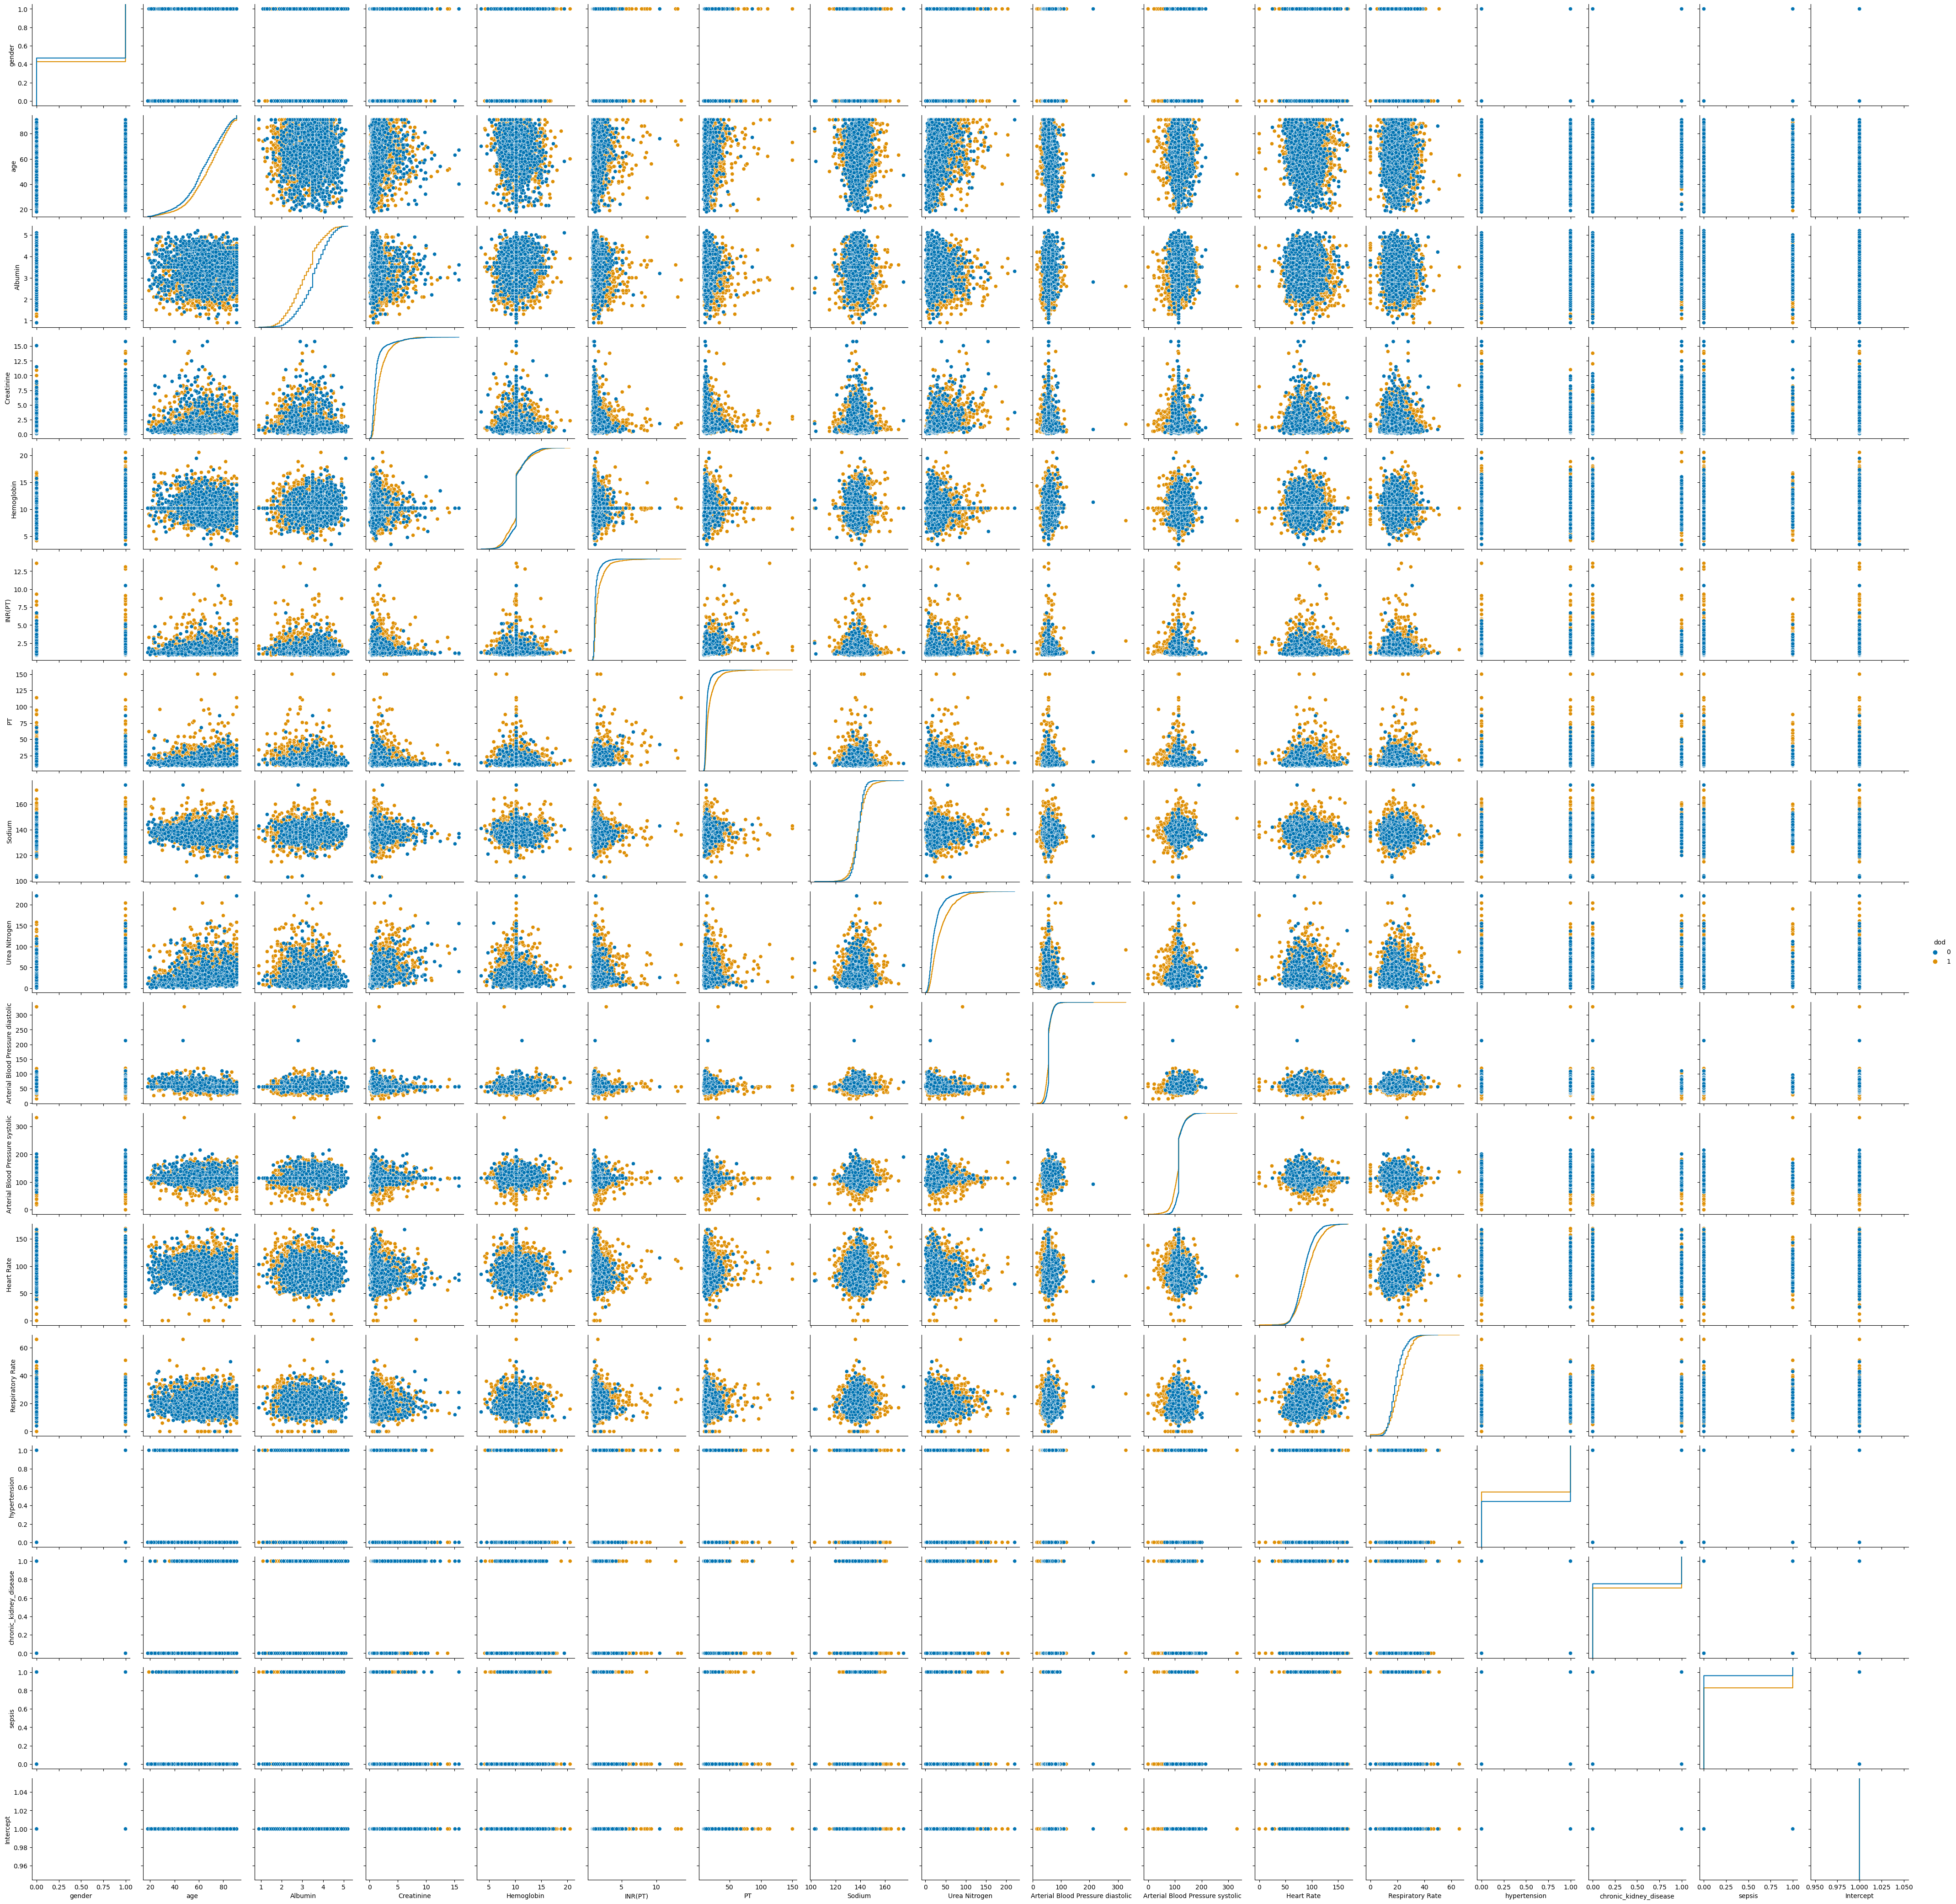

In [4]:
visualiser(final_dod, 'dod', 'dod')

Remove columns to check its affect on the prediction task

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

undersample the data to make it 30:70 split\
From baseline models, we see that RandomOverSampler, SMOTE and ADASYN do not perform too well\
therefore, we will attempt to use undersampling techniques

In [23]:
final_dod = dod_df.head(1659).append(alive_df.head(3871), ignore_index=True)
final_dod = final_dod.drop(columns=['Unnamed: 0', 'subject_id'])
final_dod

C:\Users\skyfi\AppData\Local\Temp\ipykernel_7956\3201351788.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dod = dod_df.head(1659).append(alive_df.head(3871), ignore_index=True)


dod  gender  age  Albumin  Creatinine  Hemoglobin  INR(PT)    PT  \
0       1       1   71      3.9         1.2        10.2      1.3  15.2   
1       1       0   62      4.0         1.4        12.3      1.2  13.1   
2       1       0   73      2.1         0.4        10.2      1.1  12.4   
3       1       0   79      2.1         0.2        10.2      1.3  11.4   
4       1       0   66      2.7         0.7        10.2      2.1  38.4   
...   ...     ...  ...      ...         ...         ...      ...   ...   
5525    0       0   64      3.6         1.1         9.9      2.5  13.9   
5526    0       1   77      4.2         1.9        10.4      1.1  13.1   
5527    0       1   71      4.7         1.0         8.5      1.1  11.9   
5528    0       1   55      4.2         1.2         8.8      1.2  14.0   
5529    0       1   77      3.5         0.6        10.2      1.3  14.0   

      Sodium  Urea Nitrogen  Arterial Blood Pressure diastolic  \
0      136.0           53.0                               56.0   
1      134.0           45.0                               56.0   
2      134.0           11.0                               56.0   
3      134.0           16.0                               56.0   
4      143.0           19.0                               54.0   
...      ...            ...                                ...   
5525   141.0           18.0                               61.0   
5526   143.0           25.0                               61.0   
5527   139.0           15.0                               53.0   
5528   141.0           29.0                               66.0   
5529   136.0           12.0                               56.0   

      Arterial Blood Pressure systolic  Heart Rate  Respiratory Rate  \
0                                114.0       128.0              26.0   
1                                114.0        94.0              12.0   
2                                114.0       103.0              26.0   
3                                114.0        91.0              18.0   
4                                117.0        90.0              24.0   
...                                ...         ...               ...   
5525                             123.0        78.0              14.0   
5526                             146.0        70.0              24.0   
5527                             120.0        67.0              18.0   
5528                              67.0        82.0              27.0   
5529                             114.0        60.0              15.0   

      hypertension  chronic_kidney_disease  sepsis  Intercept  
0                1                       0       0          1  
1                0                       0       0          1  
2                0                       0       0          1  
3                0                       0       0          1  
4                1                       0       0          1  
...            ...                     ...     ...        ...  
5525             1                       1       0          1  
5526             1                       1       0          1  
5527             1                       1       0          1  
5528             1                       1       0          1  
5529             0                       0       0          1  

[5530 rows x 18 columns]

In [52]:
# ALl column names
relevant_columns = ['dod','gender', 'age', 'Albumin',
       'Creatinine', 'Hemoglobin', 'INR(PT)', 'PT', 'Sodium', 'Urea Nitrogen',
       'Arterial Blood Pressure diastolic', 'Arterial Blood Pressure systolic',
       'Heart Rate', 'Respiratory Rate', 'hypertension',
       'chronic_kidney_disease', 'sepsis', 'Intercept']

#Average across multiple states to get an accurate measurement
random_states = [0,1,2,3,4,5,6,7,8,9,0,10,12,13,14,15,16,17,18,19,20]

# Removed Pair + Accuracy
removal_pairs = []



for i, col in enumerate(relevant_columns):   
    # Get the baseline
    if i == 0:
        X = final_dod.drop(columns=['dod'])
        col = 'baseline'
    else:
        X = final_dod.drop(columns=['dod', col]) 
    y = final_dod['dod']
    total_accuracy = 0
    total_precision = 0
    total_recall = 0
    
    for j in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=j)
        # Train the model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        # Predict
        y_pred_lin = lin_reg.predict(X_test)
        # Convert predictions to binary using 0.5 as threshold
        y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred_lin]
        total_accuracy += accuracy_score(y_test, y_pred_bin)
        total_precision += precision_score(y_test, y_pred_bin)
        total_recall += recall_score(y_test, y_pred_bin)
        
        
    removal_pairs.append([col, total_accuracy/len(random_states),total_precision/len(random_states) ,total_recall/len(random_states) ])
    # print("Accuracy of", col , total/len(random_states))

removal_df = pd.DataFrame(removal_pairs, columns=['removed', 'accuracy', 'precision', 'recall'])
removal_df = removal_df.sort_values(by=['accuracy'])
removal_df

removed  accuracy  precision    recall
11   Arterial Blood Pressure systolic  0.748256   0.665412  0.325014
13                   Respiratory Rate  0.749376   0.669007  0.327022
12                         Heart Rate  0.751399   0.677489  0.329030
2                                 age  0.751830   0.669058  0.343373
15             chronic_kidney_disease  0.753078   0.672381  0.346672
3                             Albumin  0.753122   0.704690  0.306942
4                          Creatinine  0.754069   0.675587  0.347676
7                                  PT  0.754112   0.676430  0.347676
16                             sepsis  0.754155   0.676702  0.347390
14                       hypertension  0.755188   0.677797  0.351836
0                            baseline  0.755619   0.678313  0.353844
17                          Intercept  0.755619   0.678313  0.353844
10  Arterial Blood Pressure diastolic  0.755619   0.678186  0.353557
9                       Urea Nitrogen  0.755662   0.688389  0.341222
1                              gender  0.756265   0.680928  0.353987
6                             INR(PT)  0.756351   0.683990  0.350688
5                          Hemoglobin  0.756824   0.683335  0.353987
8                              Sodium  0.757083   0.684012  0.354705

In [53]:
removed_cols = removal_df['removed'].tail(6).values.tolist()
removed_cols.append('dod')
no_remove_cols = removal_df['removed'].head(9).values.tolist()
no_remove_cols.append('dod')

In [54]:
X = final_dod.drop(columns=['dod']) 
y = final_dod['dod']
total_accuracy = 0
total_precision = 0
total_recall = 0
for j in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.2, random_state=j)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred_lin]
    total_accuracy += accuracy_score(y_test, y_pred_bin)
    total_precision += precision_score(y_test, y_pred_bin)
    total_recall += recall_score(y_test, y_pred_bin) 
print(f'Non Removed accuracy: { total_accuracy/len(random_states)} precision: { total_precision/len(random_states)} recall: { total_recall/len(random_states)}')

X = final_dod.drop(columns=removed_cols) 
y = final_dod['dod']
total_accuracy = 0
total_precision = 0
total_recall = 0
for j in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.2, random_state=j)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred_lin]
    total_accuracy += accuracy_score(y_test, y_pred_bin)
    total_precision += precision_score(y_test, y_pred_bin)
    total_recall += recall_score(y_test, y_pred_bin) 
print(f'Removal Multiple accuracy: { total_accuracy/len(random_states)} precision: { total_precision/len(random_states)} recall: { total_recall/len(random_states)}')

X = final_dod.drop(columns=no_remove_cols) 
y = final_dod['dod']
total_accuracy = 0
total_precision = 0
total_recall = 0
for j in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.2, random_state=j)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred_lin]
    total_accuracy += accuracy_score(y_test, y_pred_bin)
    total_precision += precision_score(y_test, y_pred_bin)
    total_recall += recall_score(y_test, y_pred_bin) 
print(f'Removal Multiple important accuracy: { total_accuracy/len(random_states)} precision: { total_precision/len(random_states)} recall: { total_recall/len(random_states)}')


Non Removed accuracy: 0.7556187031774735 precision: 0.6783132570420884 recall: 0.3538439472174412
Removal Multiple accuracy: 0.7570825798673899 precision: 0.6996907969335823 recall: 0.3349110728628801
Removal Multiple important accuracy: 0.7125635064152244 precision: 0.5982276990302798 recall: 0.12923121055651177


In [55]:
full_df =  aki_df.drop(columns=['Unnamed: 0', 'subject_id']) 

In [56]:
# Removed Pair + Accuracy
removal_pairs = []


for i, col in enumerate(relevant_columns):   
    # Get the baseline
    if i == 0:
        X = full_df.drop(columns=['dod']) 
        col = 'baseline'
    else:
        X = full_df.drop(columns=['dod', col])
    y = full_df['dod']
    
    total_accuracy = 0
    total_precision = 0
    total_recall = 0
    
    for j in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,shuffle=True, test_size=0.2, random_state=j)
        # Train the model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        # Predict
        y_pred_lin = lin_reg.predict(X_test)
        # Convert predictions to binary using 0.5 as threshold
        y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred_lin]
        total_accuracy += accuracy_score(y_test, y_pred_bin)
        total_precision += precision_score(y_test, y_pred_bin)
        total_recall += recall_score(y_test, y_pred_bin)
        
        
    removal_pairs.append([col, total_accuracy/len(random_states),total_precision/len(random_states) ,total_recall/len(random_states) ])
    # print("Accuracy of", col , total/len(random_states))

removal_df = pd.DataFrame(removal_pairs, columns=['removed', 'accuracy', 'precision', 'recall'])
removal_df = removal_df.sort_values(by=['accuracy'])
removal_df


removed  accuracy  precision    recall
11   Arterial Blood Pressure systolic  0.838187   0.685567  0.081899
15             chronic_kidney_disease  0.838576   0.705861  0.079604
7                                  PT  0.838673   0.706771  0.080321
3                             Albumin  0.838721   0.700691  0.082760
6                             INR(PT)  0.838916   0.698563  0.085772
13                   Respiratory Rate  0.839717   0.707602  0.091079
9                       Urea Nitrogen  0.839717   0.739539  0.082473
12                         Heart Rate  0.840008   0.721932  0.089071
16                             sepsis  0.840153   0.734166  0.087780
10  Arterial Blood Pressure diastolic  0.840493   0.722103  0.094664
8                              Sodium  0.840542   0.724067  0.094378
4                          Creatinine  0.840712   0.727729  0.094951
0                            baseline  0.840833   0.727683  0.096099
17                          Intercept  0.840833   0.727683  0.096099
1                              gender  0.840882   0.732851  0.095095
5                          Hemoglobin  0.840930   0.730866  0.096242
14                       hypertension  0.841076   0.740084  0.094378
2                                 age  0.841100   0.731273  0.097533

In [57]:
removed_cols = removal_df['removed'].tail(4).values.tolist()
removed_cols.append('dod')
no_remove_cols = removal_df['removed'].head(12).values.tolist()
no_remove_cols.append('dod')

In [60]:
X = full_df.drop(columns=['dod']) 
y = full_df['dod']
total_accuracy = 0
total_precision = 0
total_recall = 0
for j in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.2, random_state=j)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred_lin]
    total_accuracy += accuracy_score(y_test, y_pred_bin)
    total_precision += precision_score(y_test, y_pred_bin)
    total_recall += recall_score(y_test, y_pred_bin) 
print(f'Non Removed accuracy: { total_accuracy/len(random_states)} precision: { total_precision/len(random_states)} recall: { total_recall/len(random_states)}')

X = full_df.drop(columns=removed_cols) 
y = full_df['dod']
total_accuracy = 0
total_precision = 0
total_recall = 0
for j in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.2, random_state=j)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred_lin]
    total_accuracy += accuracy_score(y_test, y_pred_bin)
    total_precision += precision_score(y_test, y_pred_bin)
    total_recall += recall_score(y_test, y_pred_bin) 
print(f'Removal Multiple accuracy: { total_accuracy/len(random_states)} precision: { total_precision/len(random_states)} recall: { total_recall/len(random_states)}')


Non Removed accuracy: 0.8408329692733364 precision: 0.7276828247367638 recall: 0.09609868043602983
Removal Multiple accuracy: 0.8414397359351488 precision: 0.7469903193765373 recall: 0.09595524956970738


In [ ]:
full_df